<a href="https://colab.research.google.com/github/FelipePRosa/Data-Science-Projects/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito
<p align=left>
<img src="https://image.freepik.com/vetores-gratis/conceito-de-seguranca-cibernetica_53876-90448.jpg" width=35%></p>

*by [Felipe Rosa](https://www.linkedin.com/in/felipe-pimentel-rosa-19975b10b/)*<br>
*Blog: [Medium](https://medium.com/@felipepimentelrosa)*

---
<br>

Um dos meios preferidos de pagamento utilizado pelos brasileiros é o cartão de crédito. Por conta disto e de outros motivos mais, este método é um dos mais visados na realização de golpes e fraudes.

Por mais que muitos golpes sejam resultados de descuidos com as informações pessoais dos usuários, muitos outros são fruto de ataques digitais para conseguir acesso ao cartão de crédito dos clientes dos bancos.

Os tipos de fraude variam, tendo os principais como:
* Clonagem de cartão
* Número Falso de Cartão
* Roubo de Informações de Cartão

<p align=center>
<img src="https://image.freepik.com/fotos-gratis/cadeado-de-papel-perfurado-de-sistema-de-seguranca-de-rede_53876-14234.jpg" width="50%"></p>

Durante a pandemia no Brasil, mais precisamente na metade de 2020, reclamações relativas a cobranças ou saques não reconhecidos mais do que dobraram em poucos meses comparados aos dados do ano anterior. Os registros saltaram de 1.154 para 2.445, uma alta de 111,8%, segundo dados do Consumidor.gov, portal de intermediação de conflitos da Secretaria Nacional de Defesa do Consumidor (Senacon), órgão do Ministério da Justiça e Segurança Pública.

Aqui iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações dos bancos e principalmente dos usuários dos mesmos. A detecção de tal fraude é de suma importância com base no efeito que o ato pode ter gerando prejuízos consideráveis tanto para o consumidor quanto apra a instituição financeira a qual a fraude está em proveito.

Para isso, esse projeto terá como meta criar um método de detecção de fraudes baseado em um banco de dados com histórico de transações normais e fraudulentas. Tão importante como a detecção das fraudes é manter as transações normais intactas, para que os usuários padrões não sejam afetados de maneira errônea.

Com essas informações em mente, é óbvio imaginar que uma inteligência artificial que consiga prevenir esses tipos de atos, mas também consiga prevalecer a integridade dos usuários regulares tem valor de milhões de Reais para as instituições financeiras. Os algoritmos de machine learning que serão apresentados aqui terão como finalidade encontrar este balanço entre a punição de fraudes e estabilidade das transações comuns, tentando aprimorar cada vez mais esta análise de forma automática.

## Importando os Dados

O dataset utilizado neste projeto contem transações monetárias realizadas com cartão de crédito de Setembro de 2013 por proprietários de cartões na europa. Estes dados apresentam transações que ocorreram em dois dias, onde são disponibilizadas 492 fraudes das quase 290 mil transações. Este banco de dados é extremamente desbalanceado, totalizando um valor de 0.172% dos valores totais como positivos para fraudes.

<p align=center>
<img src="https://image.freepik.com/fotos-gratis/conceito-de-seguranca-de-seguranca-corporativa-de-protecao-de-negocios_53876-64964.jpg" width="50%"></p>

Contendo apenas inputs de variáveis numéricas que são resultados de uma técnica de de transformação para redução de valores chamada Análise de Componentes Principais (Principal Component Analysis - PCA). Devido a motivos de confiabilidade e segurança, os dados originais não podem ser fornecidos nem outras informações sobre os valores disponibilizados no dataset. As variáveis $[V1, V2, V3 \dots, V28]$ são os **componentes principais** obtidos com a aplicação do PCA. As únicas características que se permaneceram inalteradas foram Time e Amount.

* Time: Refere ao tmepo em segundos entre cada transação realizada no dataset e a primeira transalção da base de dados.
* Amount: É a quantidade da transação realizada, que pode ser utilizado para análise de correlação de valor com fraude
* Class: A resposta supervisionada de detecção de fraude, tendo valor 1 para transação fraudulenta e 0 para transação normal.

Os dados utilizados podem ser visualizados e extraídos diretamente [nesta página](https://www.kaggle.com/mlg-ulb/creditcardfraud). No link, é possível perceber que os dados já são disponibilizados com a aplicação do método PCA e as variáveis para análise citadas acima.

Podemos então começar a importar as bibliotecas necessárias para realizar as análises

In [2]:
#@title *Código: Download de Biblioteca*
!pip install -q scikit-plot
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#@title *Código: Importaçao das Bibliotecas*
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from keras.regularizers import l2

from imblearn.under_sampling import RandomUnderSampler

Podemos seguir com a importação do arquivo `csv`. Para facilitar a extração, vamos utilizar um link disponibilizado no dropbox para ler os dados com o comando `pd.read_csv()`.

In [4]:
# Caminho do download da base de dados
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Primeiro podemos analisar as informações gerais dos dados para verificar os tipos de variáveis, tamanho do dataset, etc.

In [294]:
# Análise das informações gerais da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Disponibilizando os primeiros valores da tabela, podemos ter uma noção prévia dos dados que iremos trabalhar ao longo da análise

In [295]:
# Disponibilizar os 5 primeiros valores do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [296]:
# Verificar resumo estatístico do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Com o analisado acima, podemos ver que os valores das variáveis não demonstram incoerência. Os mínimos e máximos não apresentam outliers, a média e o desvio padrão é sempre em torno do mesmo valor devido ao PCA aplicado, assim como a própria distribuição dos valores. Pela contagem também aparenta não haver valores nulos da base de dados.

O único dado que devemos nos atentar na hora de realizar as plotagens e para não influenciar exageradamente nos resultados é a variável `amount` que apresenta dispersões grandes, porém justificáveis.

Com isso podemos seguir e analisar se existem valores negativos para tirar a conclusão definitiva:

In [297]:
# Quantidade máxima de valores nulos distribuidos
df.isnull().sum().max()

0

O máximo de valores nulos encontrado foi de 0, confirmando que não há variáveis com valor nulo em qualquer parte do dataset. Isso não isenta a base de dados original de ter um valor 0, já que estes valores analisados estão sobre efeito do filtro PCA aplicado, porém demonstra que não há valores corrompidos inseridos no dataset.

Proceguindo as análises, como mencionado no enunciado, a base de dados está extremamente desbalanceada, vamos verificar qual o nível desta divergências de valores.

Quantidade de Valores Normais: 284315
Quantidade de Valores Fraudados: 492


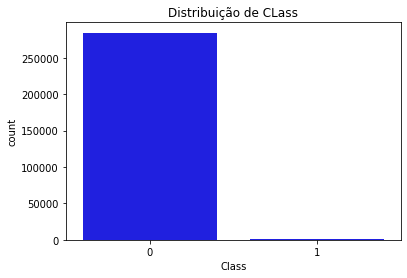

In [298]:
# Verificaçao do balanceamento das informações do dataset
fg, ax = plt.subplots()
print('Quantidade de Valores Normais:', df.Class[df.Class==0].count())
print('Quantidade de Valores Fraudados:', df.Class[df.Class==1].count())
sns.countplot(df.Class, color='blue')
ax.set_title('Distribuição de CLass')
plt.show()

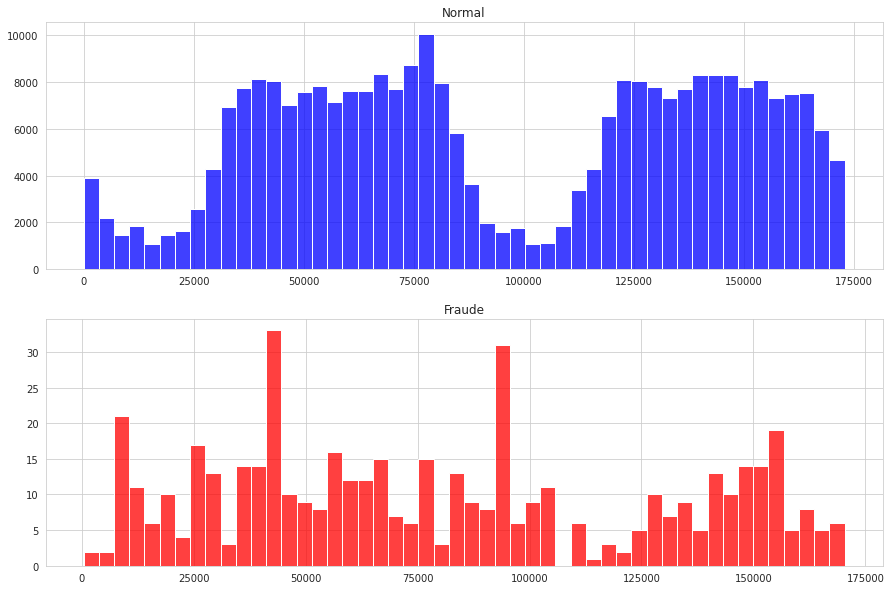

In [299]:
# Plotagem do tipo de transação por tempo
sns.set_style('whitegrid')
fg, ax = plt.subplots(2,1, figsize=(15,10))
sns.histplot(df.Time[df.Class == 0], ax=ax[0], bins=50, color='blue')
ax[0].set_title('Normal')  
ax[0].set_ylabel('')
ax[0].set_xlabel('')
sns.histplot(df.Time[df.Class == 1], ax=ax[1], bins=50, color='red')
ax[1].set_title('Fraude')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

Segundo a dispersão disposta acima, fica claro que não há uma correlação entre o tempo realizado da transação e o fator de ser ou não uma atitude fraudulenta realizada.

Seguimos então para plotagem do gráfico de caixa para encontrar um padrão de divergência entre o modelo dos golpes e das transações normais.

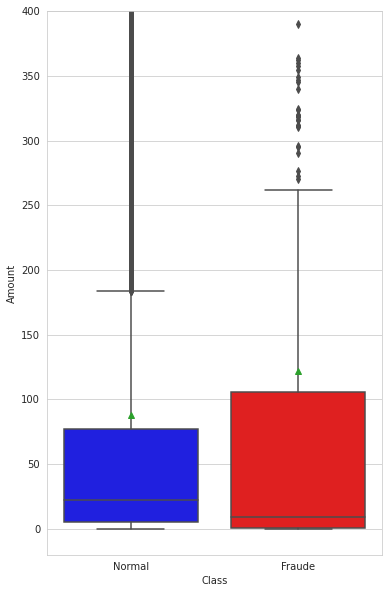

In [300]:
# Plotagem do gráfico de caixa para análise de dispersão dos valores de transação
fg, ax = plt.subplots(figsize=(6,10))
sns.boxplot(df.Class,df.Amount, showmeans=True, ax=ax, palette=('blue', 'red'))
ax.set_ylim(-20,400)
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.show()

In [5]:
# Analisando os valores dispostos em Amount
df[(df.Class == 1) & (df.Amount < 400)]['Amount'].describe()

count    450.000000
mean      57.170911
std       90.700972
min        0.000000
25%        1.000000
50%        6.090000
75%       99.990000
max      390.000000
Name: Amount, dtype: float64

Para podermos visualizar melhor a diferença entre as variáveis dispostas na base de dados e o resultado de ser ou não uma fruade aplicada, podemos dividir os gráficos de cada uma dessas variáveis e identificar a diferença entre elas em cada caso.

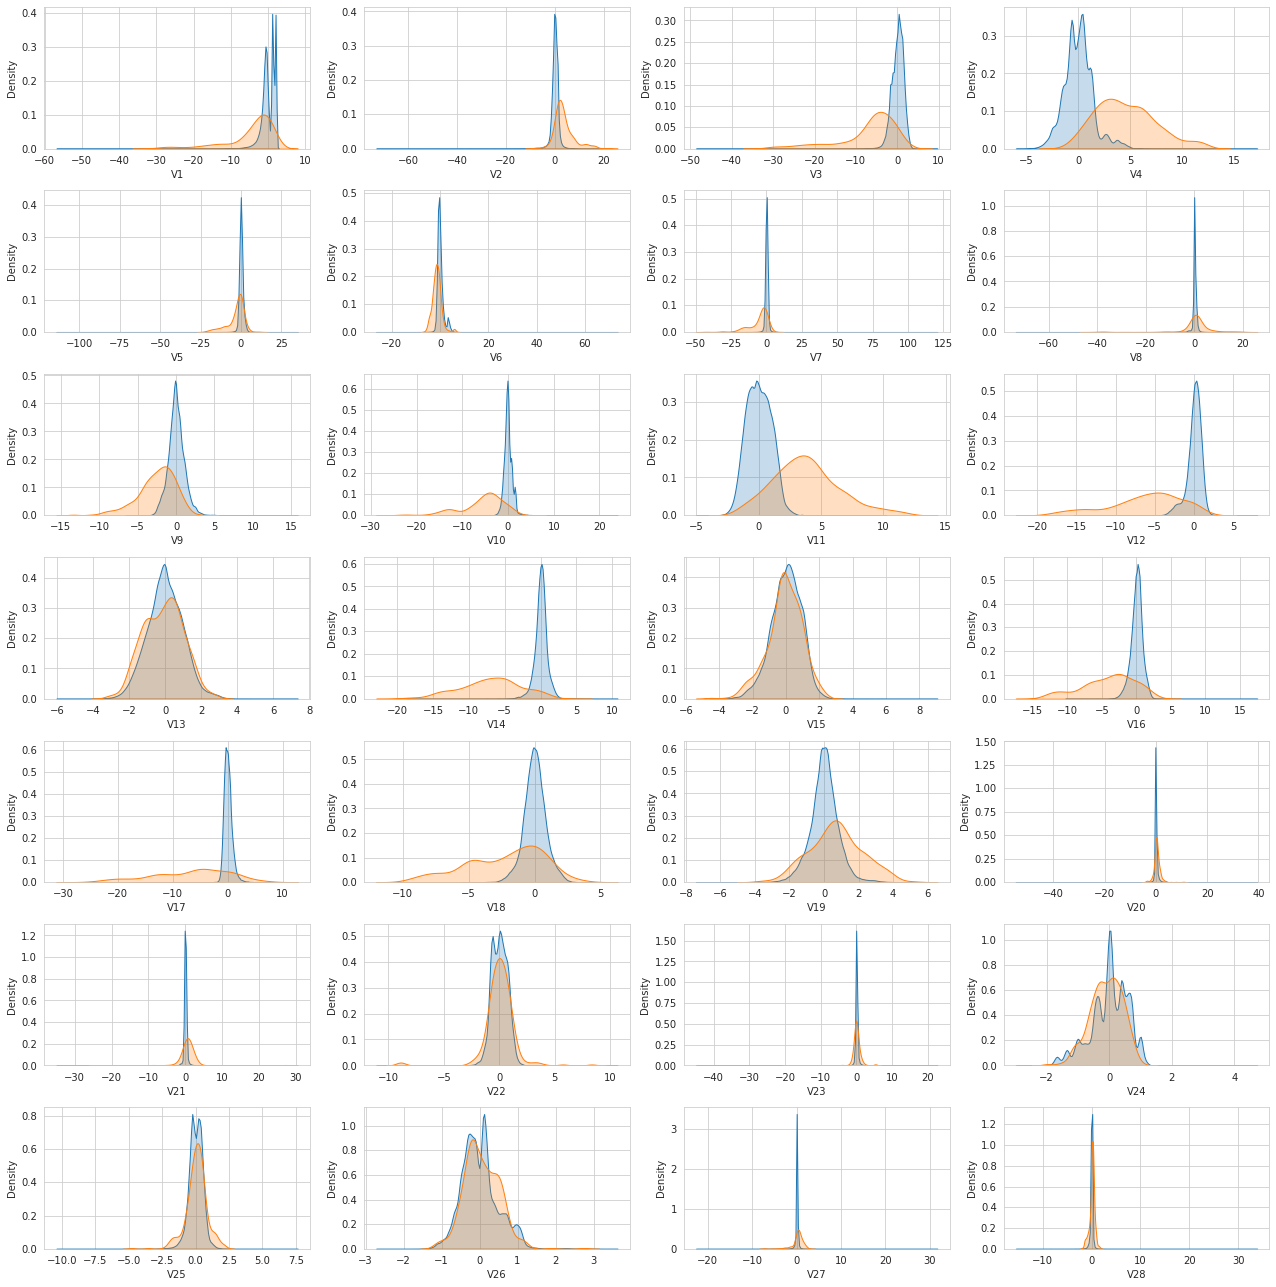

In [302]:
# Plotagem dos gráficos das variáveis para fraudes e transaçõe normais
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df[df.Class == 0][col], label="Class 0", shade=True)
    sns.kdeplot(df[df.Class == 1][col], label="Class 1", shade=True)
    # plt.title(col, fontsize=10)
plt.tight_layout()

Em alguns casos nota-se que o padrão é exatamente o mesmo, como por exemplo $[V15, V22, V25\ e\  V28]$, tornando a identificação das fraudes do modelos extremamente improváveis se analisados somente esses inputs.

Em contrapartida, algumas variáveis como $[V3, V10, V12\ e\ V14]$ mostram um comportamento completamente diferente entre o padrão dos tipos de transação.

## Preparação dos Dados

Como visto, as únicas variáveis que permaneceram com os valores inalterados foram `Time` e `Amount`. Para uma melhor aplicação dos métodos que serão tratados aqui, é importante escalar estes valores para que se tornem representações menores de seus valores reais.

In [7]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Em seguida, vamos dividir as amostras coletadas em dados de treino e dados de teste. Isso é importante para não realizar um overfit (tornar o algoritmo extremamente expecífico para apenas os casos apresentados) no nosso método de prevenção de fraudes.

Dessa forma, podemos validar o resultado com os dados de teste separados.

In [11]:
# Divisão entre dados de treino e dados de teste
X = df_clean.drop('Class', axis=1)
Y = df_clean['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print('Dados das matrizes geradas para treino e teste')
print('Dimensões da matriz de treino X: ',X_train.shape)
print('Dimensões da matriz de teste X: ',X_test.shape)
print('Dimensões da matriz de treino Y: ',Y_train.shape)
print('Dimensões da matriz de teste Y: ',Y_test.shape)

Dados das matrizes geradas para treino e teste
Dimensões da matriz de treino X:  (213605, 30)
Dimensões da matriz de teste X:  (71202, 30)
Dimensões da matriz de treino Y:  (213605,)
Dimensões da matriz de teste Y:  (71202,)


Agora com a divisão realizada, podemos ajustar nossos dados de treino. Lembrando no alto nível de desbalanceamento da base de dados original, vamos aproximar a quantidade de valores fraudados e valores normais para poder analisar a correlação entre as variáveis.

1    370
0    370
dtype: int64


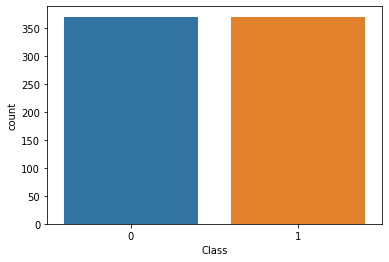

In [13]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, Y_rus = rus.fit_sample(X_train, Y_train)

# ver o balanceamento das classes
print(pd.Series(Y_rus).value_counts())
# plotar a nova distribuição de classes
fg, ax = plt.subplots()
sns.countplot(Y_rus, ax=ax);
ax.set_xlabel('Class')
plt.show()

Agora com os dados balanceados, pode-se notar a diferença que conseguimos ao relacionar as variáveis com o fato de ser uma fraude ou não:

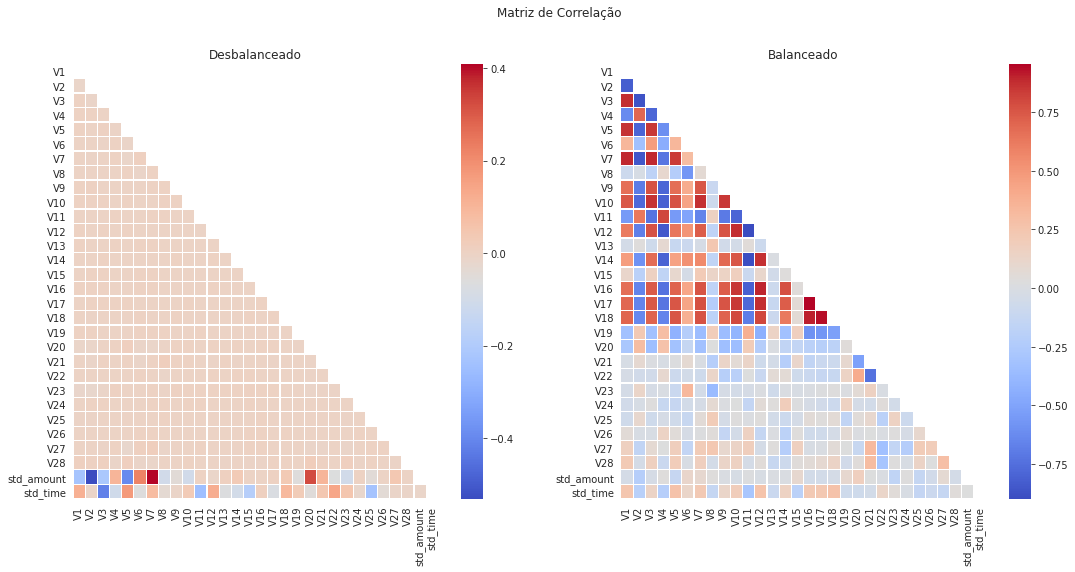

In [334]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
map = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, mask=mask,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns, mask=mask,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Nota-se a diferença enorme entre as correlações quando se trata com dados balanceados e desbalanceados. Isso se deve ao fato de os valores de transação normal, por serem extremamente superiores ao valores de transação fraudulenta, alterarem o padrão geral dos dados.

Os poucos dados de fraude disponíveis no dataset não seriam o suficiente para demonstrar uma mudança expressiva na correlação entre todos os dados (afinal, eles representam um valor de 0.172% dos dados apenas).

## Modelo de Machine Learning

Com os dados preparados, podemos então começar a preparar nossos modelos de aprendizado automático para realizar a previsão dos dados selecionados anteriormente.

Os valores `X_rus` e `Y_rus` representam os dados de treino balanceados em nível de fraude, logo serão estes os utilizados para treinar os modelos de machine learning.

### Análise dos Modelos de Machine Learning a serem Aplicados

Podemos ter uma prévia dos valores que encontraremos em cada um dos modelos que serão aplicados.

In [43]:
# Geração de modelo dos 5 métodos aplicados acima
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Test options and evaluation metric
num_folds = 20
seed = 2
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LGR ', LogisticRegression()))
models.append((' GNB ', GaussianNB()))
models.append((' SCV ', SVC(kernel='poly')))
models.append((' DTC ', DecisionTreeClassifier()))
models.append((' KNN ', KNeighborsClassifier()))

In [46]:
# Verificação das validações cruzadas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_rus, Y_rus, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LGR : 0.747105 (0.173880)
 GNB : 0.647228 (0.156326)
 SCV : 0.483428 (0.185885)
 DTC : 0.528303 (0.230726)
 KNN : 0.736356 (0.144231)


Dessa forma temos o resultado da validação cruzada dos treinos de cada método de machine learning com os testes. Ainda assim, é encessário analisar os valores de aprovação e rejeito para cada específico

### Logistic Regression

A regressão logística é uma técnica que se baseia em reduzir a curva de erro do método de prevenção. Cada variável contém um valor multiplicativo que será impactado de acordo com o erro entre a previsão e o valor real, que sera corrigido de acordo com a derivada do erro, em busca do menor valor de erro.

In [21]:
# instanciar e treinar um modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, Y_rus)

# fazer as previsões em cima dos dados de teste
Y_pred_LogR = model.predict(X_test)

Criando a Matriz de Confusão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9706    0.9850     71080
           1     0.0508    0.9180    0.0963       122

    accuracy                         0.9705     71202
   macro avg     0.5253    0.9443    0.5406     71202
weighted avg     0.9982    0.9705    0.9835     71202

Acurácia: 0.9705

AUC: 0.9443



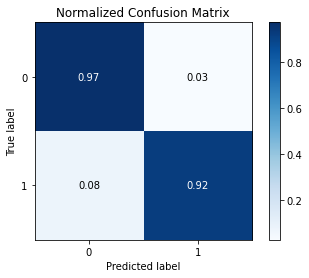

In [22]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_LogR, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_LogR, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_test, Y_pred_LogR)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(Y_test, Y_pred_LogR)))

[[68987  2093]
 [   10   112]]
0.9704643128002023


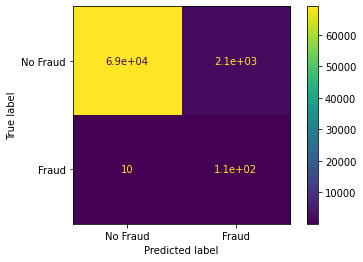

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred_LogR)
print(cm)
print(accuracy_score(Y_test, Y_pred_LogR))
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Fraud','Fraud'])
cmd.plot()
plt.show()

### Naive Bayes Classification

A Classificação de Naive Bayes consiste em aplicar o teorema de Bayes para previsão estatística. Depois de calcular a probabilidade de várias hipóteses de classe (fraude ou não) baseado nos puramente nos inputs, é selecionado aquela com a maior probabilidade e associada a observação em questão.

Por exemplo: 20% dos dados onde V15>0.5 são fraude segundo a base de dados, então se o valor de V15>0.5 na previsão logo não é fraude. Porém neste modelo com o produto de todas variáveis.

In [39]:
# instanciar e treinar um modelo de Gaussian Bayes Classification
from sklearn.naive_bayes import GaussianNB
np.random.seed(2)
model = GaussianNB()
model.fit(X_rus, Y_rus)

Y_pred_GausNB = model.predict(X_test)

Criando a Matriz de Confusão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9708    0.9851     71080
           1     0.0482    0.8607    0.0913       122

    accuracy                         0.9707     71202
   macro avg     0.5240    0.9158    0.5382     71202
weighted avg     0.9981    0.9707    0.9836     71202

Acurácia: 0.9707

AUC: 0.9158



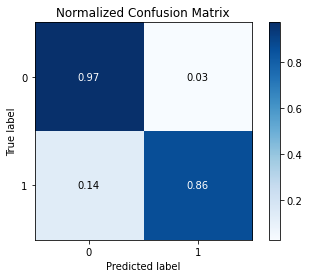

In [40]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_GausNB, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_GausNB, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_test, Y_pred_GausNB)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(Y_test, Y_pred_GausNB)))

[[69008  2072]
 [   17   105]]
0.970660936490548


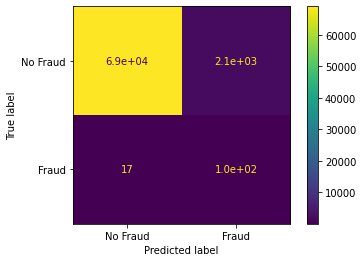

In [41]:
cm = confusion_matrix(Y_test, Y_pred_GausNB)
print(cm)
print(accuracy_score(Y_test, Y_pred_GausNB))
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Fraud','Fraud'])
cmd.plot()
plt.show()

###Suport Vector Machine

Máquina de Vetores de Suporte consiste em criar vetores para divisão dos dados. A técnica divide regiões utilizando a distância entre os pontos mais próximos da classificação em questão como padrão para gerar um vetor de classificação, no caso separando os dados nos dois lados da reta (Fraude e não fraude).

In [27]:
# instanciar e treinar um modelo de Suport Vector Machine
from sklearn.svm import SVC
np.random.seed(2)
model = SVC(kernel='poly')
model.fit(X_rus, Y_rus)

Y_pred_SVM = model.predict(X_test)
# Y_proba = model.predict_proba(X_test)

Criando a Matriz de Confusão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9984    0.9990     71080
           1     0.4498    0.7705    0.5680       122

    accuracy                         0.9980     71202
   macro avg     0.7247    0.8844    0.7835     71202
weighted avg     0.9987    0.9980    0.9983     71202

Acurácia: 0.9980

AUC: 0.8844



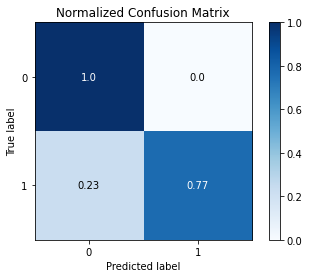

In [28]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_SVM, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_SVM, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_test, Y_pred_SVM)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(Y_test, Y_pred_SVM)))

[[70965   115]
 [   28    94]]
0.997991629448611


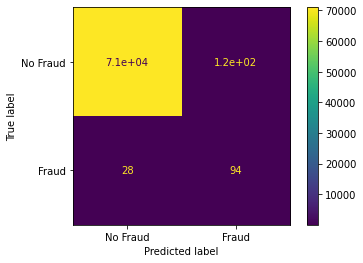

In [29]:
cm = confusion_matrix(Y_test, Y_pred_SVM)
print(cm)
print(accuracy_score(Y_test, Y_pred_SVM))
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Fraud','Fraud'])
cmd.plot()
plt.show()

### Decision Tree

A àrvore de Decisões consiste em criar uma série de comparativos dos valores de input como maior e menor em formato de ramificaçoes para desmembrar os dados. Aplicando essa ramificação nos dados de treino, todos valores são classificados pela mesma e essas ramificaçoes abrangem todos esses dados. Aplicando os dados de teste, os novos valores são filtrados pelos comparativos da árvore de decisão e por fim classificados de acordo com a base de treino.

In [30]:
# instanciar e treinar um modelo de Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
np.random.seed(2)
model = DecisionTreeClassifier()
tree = model.fit(X_rus, Y_rus)

Y_pred_DTC = model.predict(X_test)

Criando a Matriz de Confusão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9070    0.9512     71080
           1     0.0167    0.9180    0.0327       122

    accuracy                         0.9070     71202
   macro avg     0.5083    0.9125    0.4919     71202
weighted avg     0.9982    0.9070    0.9496     71202

Acurácia: 0.9070

AUC: 0.9125



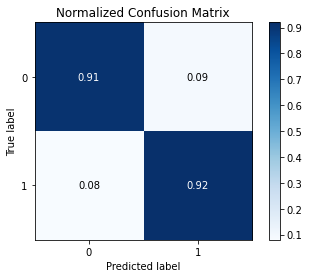

In [31]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_DTC, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_DTC, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_test, Y_pred_DTC)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(Y_test, Y_pred_DTC)))

[[64469  6611]
 [   10   112]]
0.907011039015758


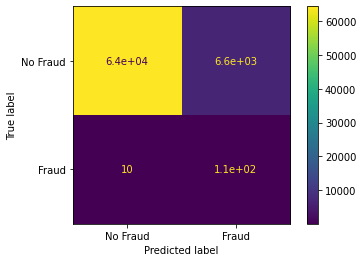

In [32]:
cm = confusion_matrix(Y_test, Y_pred_DTC)
print(cm)
print(accuracy_score(Y_test, Y_pred_DTC))
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Fraud','Fraud'])
cmd.plot()
plt.show()

### K-Nearest Neighbor

K-Vizinho mais próximo tem como princípio criar uma matriz de N dimensões com todos os dados dos valores de treino. Quando os novos valores são apresentados, é realizado um cálculo de distância em N dimensões e selecionado as informações mais próximas deste novo dado. Tirando uma média entre eles e assim selecionando o valor da classe para esse novo dado.

É importante que a quantidade de vizinhos seja sempre ímpar por questão de desempate entre os vizinhos dos dados de teste.

In [33]:
# instanciar e treinar um modelo de Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(2)
model = KNeighborsClassifier()
tree = model.fit(X_rus, Y_rus)

Y_pred_KNN = model.predict(X_test)

Criando a Matriz de Confusão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9795    0.9895     71080
           1     0.0695    0.8934    0.1289       122

    accuracy                         0.9793     71202
   macro avg     0.5346    0.9365    0.5592     71202
weighted avg     0.9982    0.9793    0.9881     71202

Acurácia: 0.9793

AUC: 0.9365



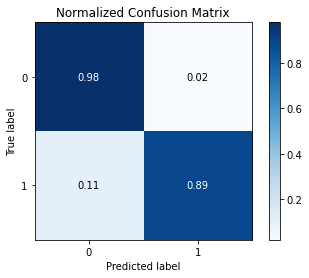

In [34]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred_KNN, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, Y_pred_KNN, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_test, Y_pred_KNN)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(Y_test, Y_pred_KNN)))

[[69620  1460]
 [   13   109]]
0.9793123788657622


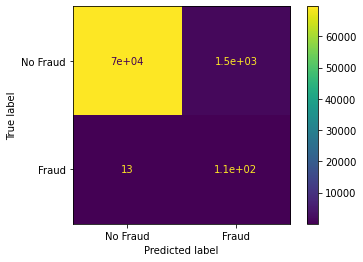

In [35]:
cm = confusion_matrix(Y_test, Y_pred_KNN)
print(cm)
print(accuracy_score(Y_test, Y_pred_KNN))
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Fraud','Fraud'])
cmd.plot()
plt.show()

### Neural Network

Por fim, a Rede Neural consiste em criar uma simulação do que seriam neurônios digitais. São criadas camadas de processamento, cada uma com um valor multiplicativo e somatório referente a cada variável. Os dados de input então são alterados de forma a terem seus valores modificados na primeira camada, que terá como resultado os inputs da segunda camada, e assim por diante até ter como resultado o output do sistema.

In [48]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
# ]Adding first Dropout layer
tf.keras.layers.Dropout(0.6)
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units= 6, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
# Adding second Dropout layer
tf.keras.layers.Dropout(0.6)
# Adding the output layer
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
# Separando a validação cruzada
X_nn_train, X_nn_val, Y_nn_train, Y_nn_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

Treinando a ANN

In [51]:
# Treinamento da Rede Neural Artificial
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
np.random.seed(2)
ann_history = ann.fit(X_nn_train, Y_nn_train, epochs=10, batch_size=32, validation_data=(X_nn_val, Y_nn_val))

Epoch 1/10
5341/5341 [==============================] - 13s 2ms/step - loss: 0.1547 - accuracy: 0.9886 - val_loss: 0.0247 - val_accuracy: 0.9983
Epoch 2/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0208 - accuracy: 0.9982 - val_loss: 0.0108 - val_accuracy: 0.9985
Epoch 3/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 0.0080 - val_accuracy: 0.9987
Epoch 4/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0072 - val_accuracy: 0.9988
Epoch 5/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.0069 - val_accuracy: 0.9991
Epoch 6/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 7/10
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0063 - val_ac

Vizualização de progressão do erro

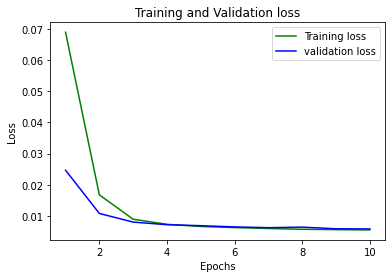

In [53]:
# Plotagem da progressão do erro
loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,len(ann_history.epoch)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Visualização de progressão da precisão

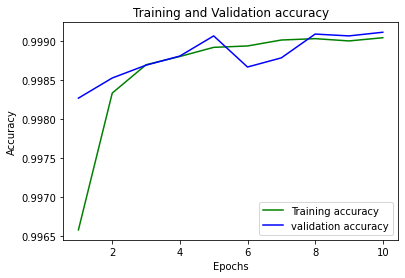

In [54]:
# Plotagem da progressão da precisão
loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,len(ann_history.epoch)+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     71080
           1     0.8750    0.5738    0.6931       122

    accuracy                         0.9991     71202
   macro avg     0.9371    0.7868    0.8463     71202
weighted avg     0.9991    0.9991    0.9990     71202

Acurácia: 0.9991

AUC: 0.7868



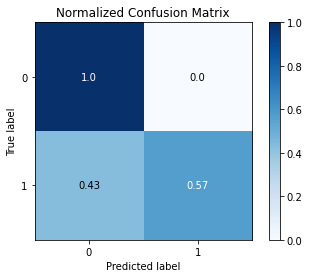

In [55]:
# plotar a matrix de confusão
Y_ann_pred_ = ann.predict(X_test)
Y_ann_pred = (Y_ann_pred_ > 0.5) 
skplt.metrics.plot_confusion_matrix(Y_test, Y_ann_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(Y_test, Y_ann_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_test, Y_ann_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(Y_test, Y_ann_pred)))

[[71070    10]
 [   52    70]]
0.9991292379427544


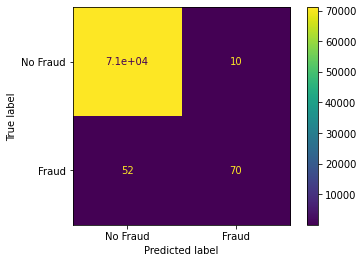

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_ann_pred)
print(cm)
print(accuracy_score(Y_test, Y_ann_pred))
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Fraud','Fraud'])
cmd.plot()
plt.show()

## Conclusão

Em análise de dados desbalanceados, a acurácia não é uma métrica adequada. Você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes.

Em cada modelo está disposta a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna *recall* do Relatório de Classificação. 

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. É importante que ambos os valores estejam bem avalidados para um resultado de previsão satisfatório.

Como observou-se, é necessário um trabalho de tratamento de dados relativamente considerável, tanto na limpeza, seleção e aplicação de filtros (como o PCA) antes de iniciar as análises preditivas utilizando os métodos apresentados.

Os diversos modelos aplicados aqui mostraram ótimos resultados para o que foi proposto e há espaço para outros algoritmos de classificação, além da melhoria nos parâmetros dos próprios métodos que foram utilizados.

A definição de uma IA melhor ou pior se torna muito dependente da aplicação realizada, como por exemplo o método de Regressão Linear que apontou uma precisão muito boa para captar fraudes, porém para tal feito 2093 transações comuns foram classificadas como fraudes. Portanto é necessário uma análise de satisfação e resultados tendo em base as soluções encontradas.

Portanto, as inteligências artificais puderam sim chegar em valores satisfatórios de prevenção, cabe ao aplicador definir qual delas teria o menor impacto financeiro não só à instituição bancária quanto ao usuário. Isso se torna arbitrário em vista que as precisões foram próximas, tendo como diferencial a aplicabilidade destas.
